## Seaborn

In [88]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


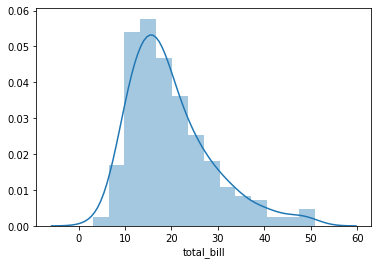

In [6]:
# dist plot --> univariate plot

sns.distplot(tips['total_bill'])

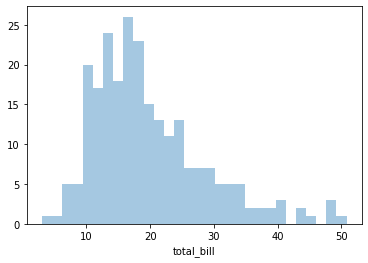

In [7]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

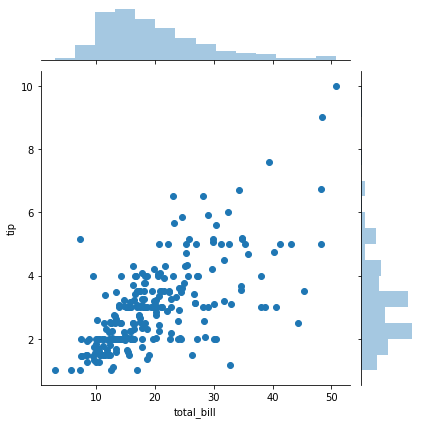

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips)

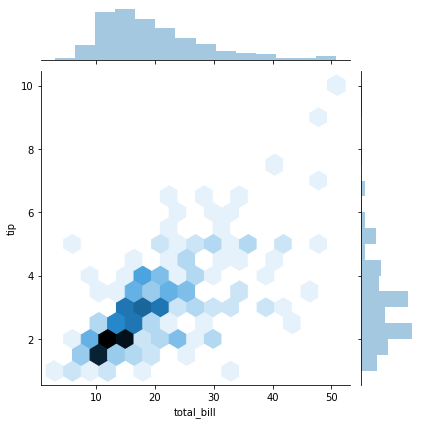

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

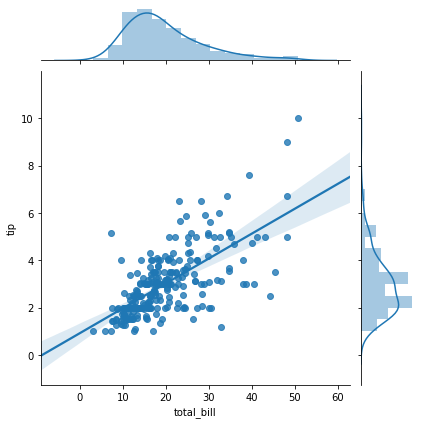

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

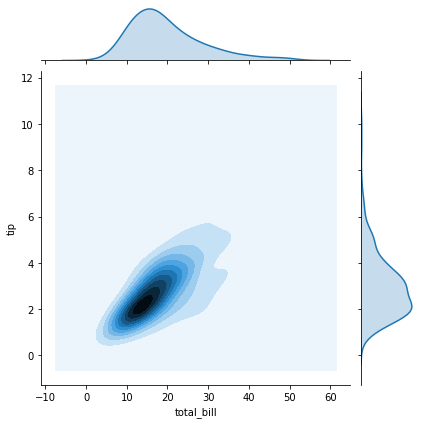

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

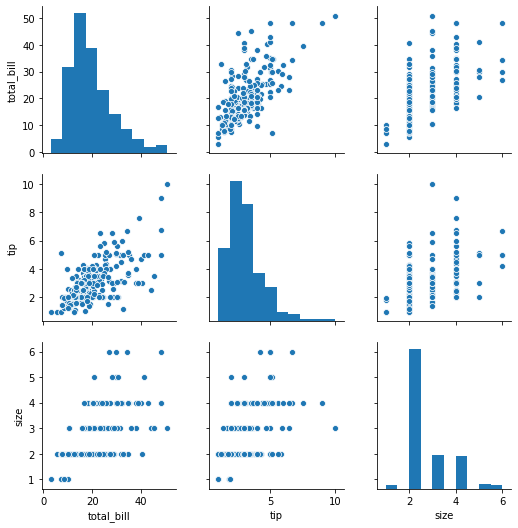

In [16]:
sns.pairplot(tips, palette='coolwarm')

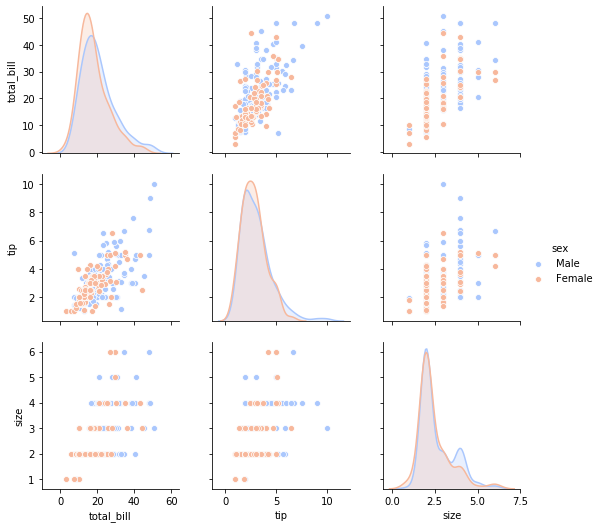

In [12]:
sns.pairplot(tips, hue='sex', palette='coolwarm') # hue to pass categorical values
# blue -> male
# ornage --> female

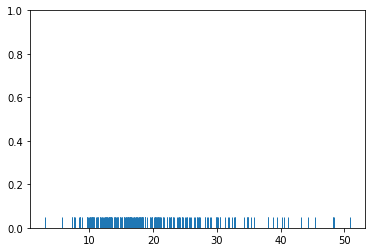

In [13]:
sns.rugplot(tips['total_bill'])

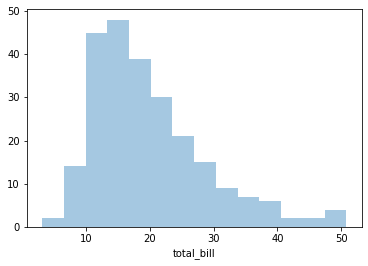

In [14]:
sns.distplot(tips['total_bill'], kde=False)

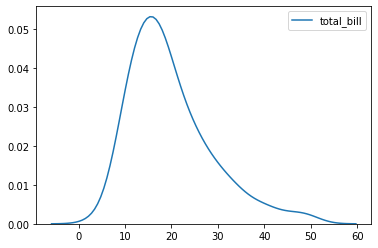

In [15]:
sns.kdeplot(tips['total_bill'])

### Categorical Plots

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


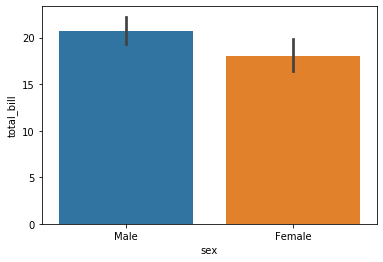

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips) # barplot gets(by default) average values for fields on categorical values

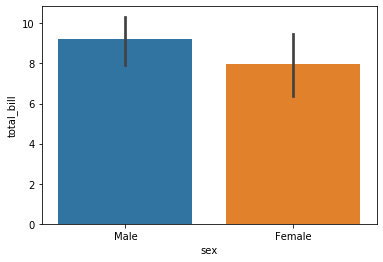

In [24]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std) # estimator to apply a method

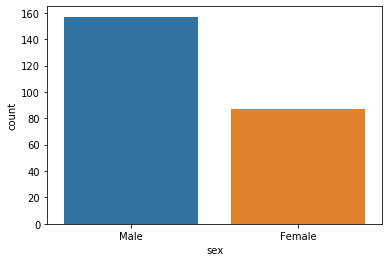

In [25]:
sns.countplot(x='sex', data=tips) # number of occurances of a category in the data

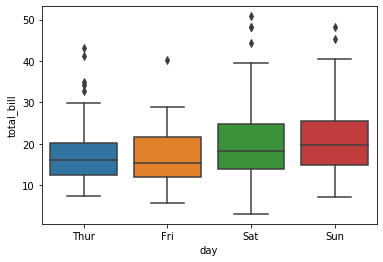

In [29]:
sns.boxplot(x='day', y='total_bill', data=tips) # gives standard distribution

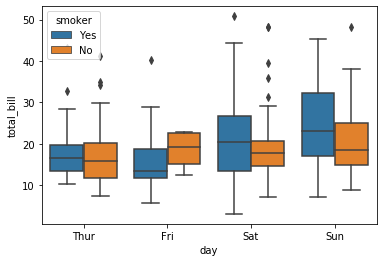

In [30]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker') # gives standard distribution difference b/w smokers and non-smokers

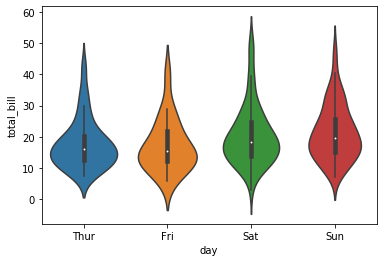

In [31]:
sns.violinplot(x='day', y='total_bill', data=tips) # little more information than boxplot

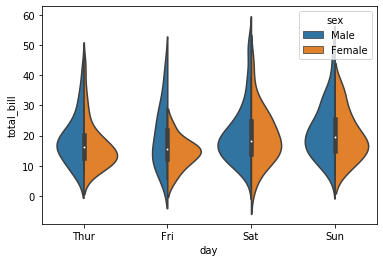

In [32]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

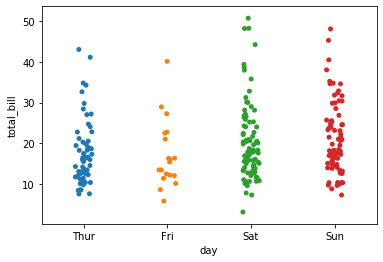

In [35]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

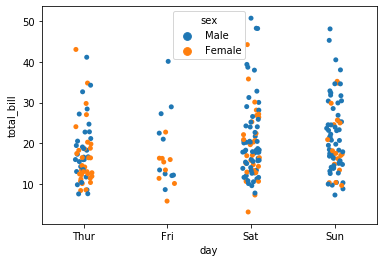

In [36]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex')

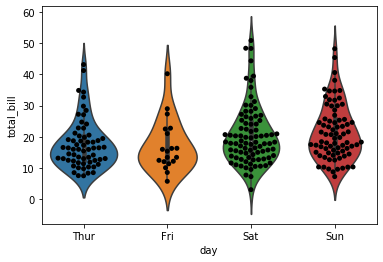

In [44]:
# combined violonplot and swarmplot
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black') # similar to stripplot, just makes sure the overlapping
# don't scale very well

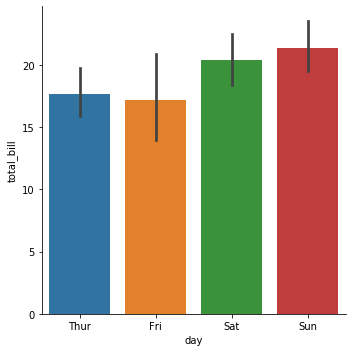

In [47]:
# catplot is used to call other types of graph
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')

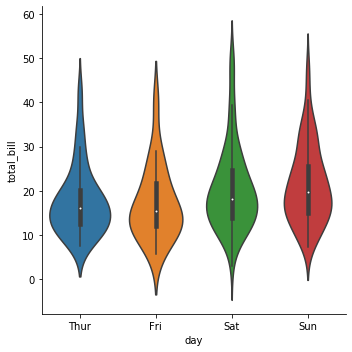

In [51]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

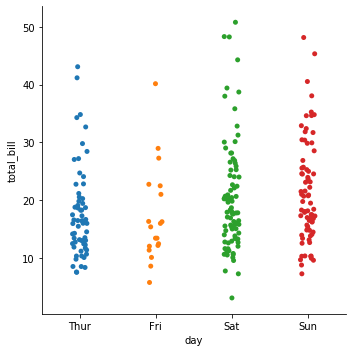

In [52]:
sns.catplot(x='day', y='total_bill', data=tips, kind='strip')

### Matrix plots

In [53]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [54]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [59]:
tc = tips.corr()

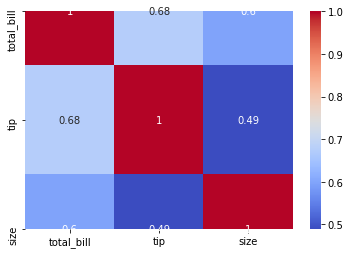

In [63]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [67]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


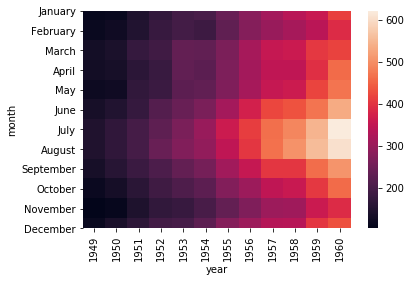

In [74]:
sns.heatmap(fp)

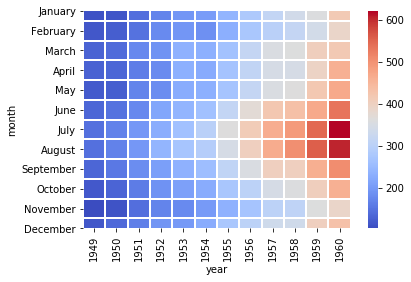

In [79]:
sns.heatmap(fp, cmap='coolwarm', linecolor='white', linewidths=1)

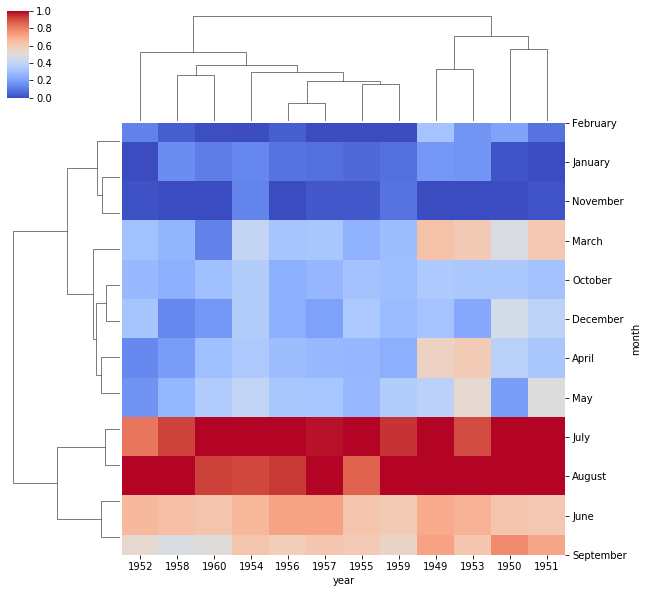

In [80]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

### Grids

In [81]:
iris = sns.load_dataset('iris')

In [82]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

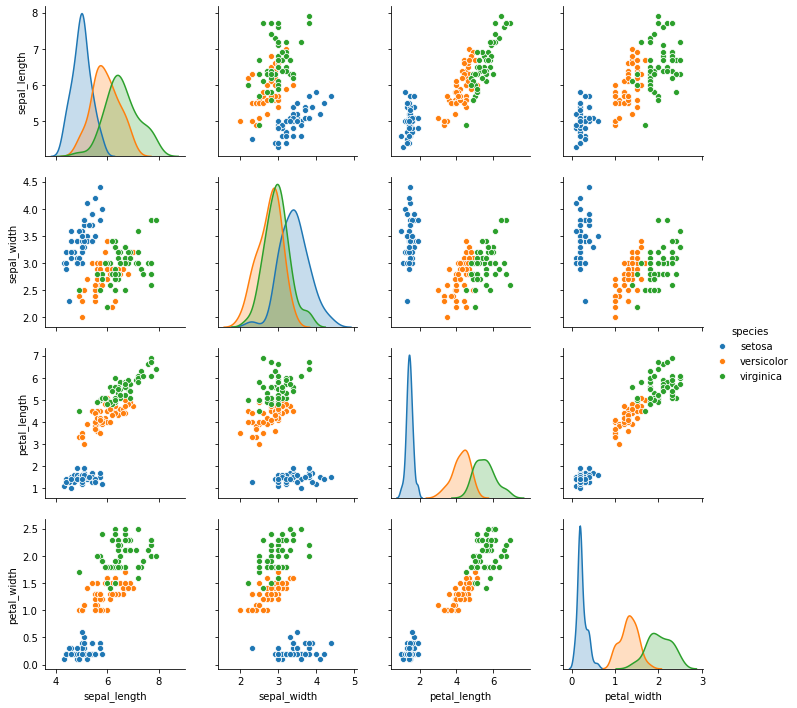

In [91]:
sns.pairplot(iris, hue='species')

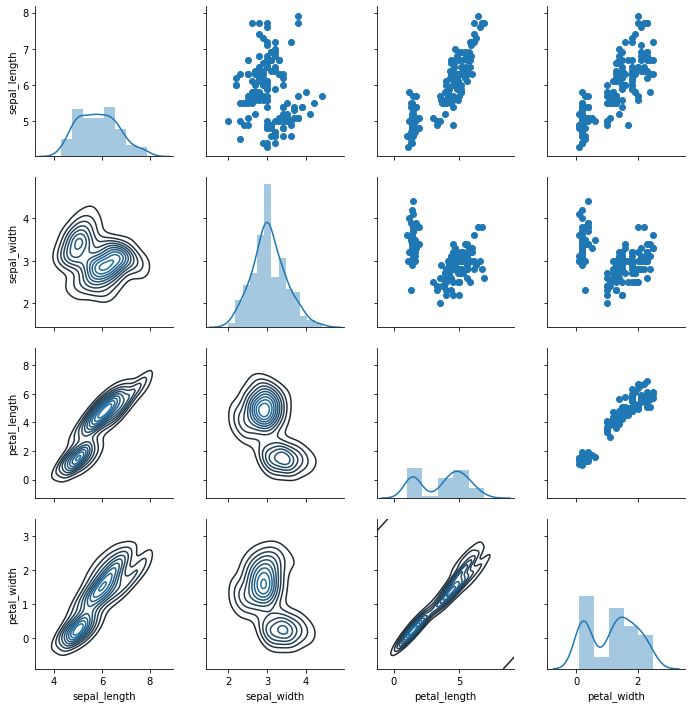

In [92]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

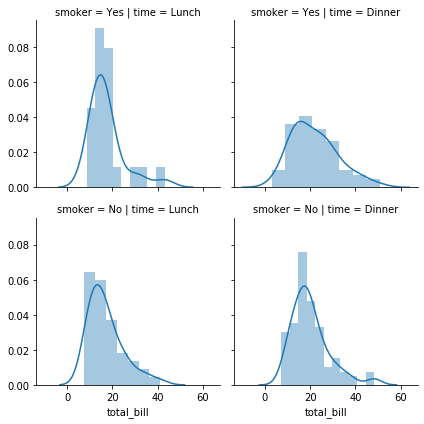

In [96]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot, 'total_bill')

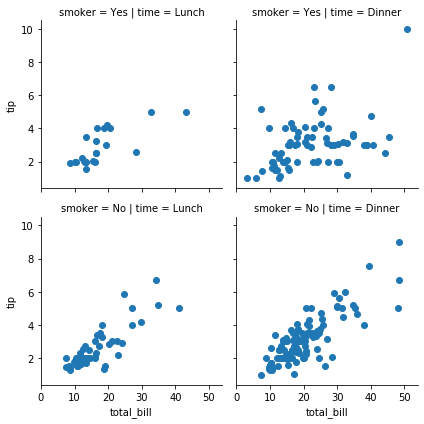

In [97]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

### Regression plots

In [98]:
# LM plot -> . Linear Model plot

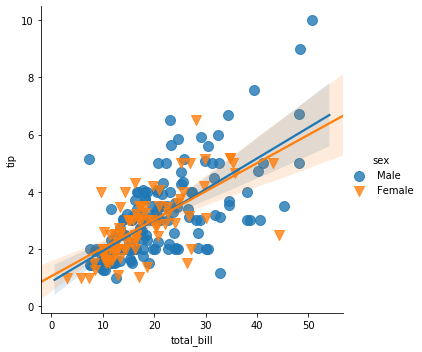

In [106]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'],
          scatter_kws={'s': 100})

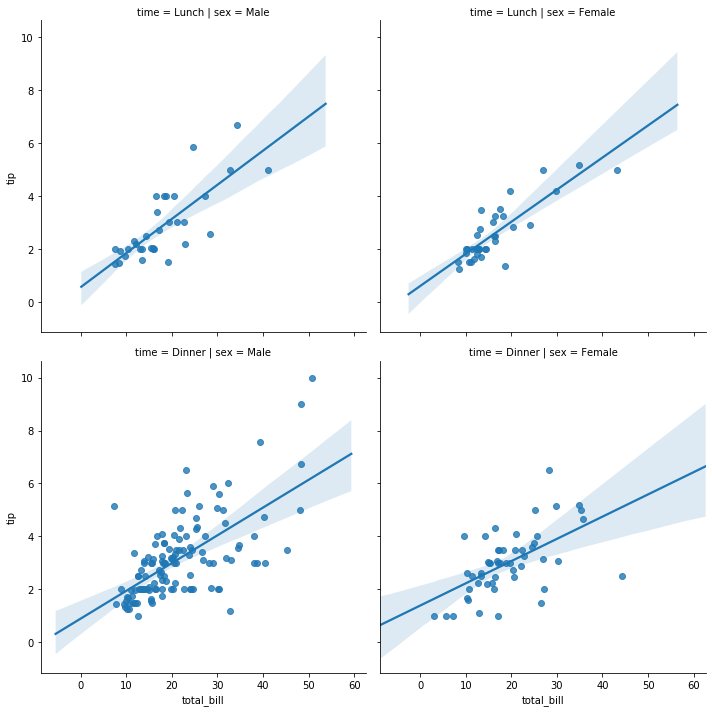

In [109]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time',
          aspect)